<a href="https://colab.research.google.com/github/Nobel712/Machine-Learning/blob/main/last_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/[2nd Times Edited Copy ] Side effects of post COVID-19 vacccination(English) (Responses) (1).xlsx - Form responses 1.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(3762, 33)

In [ ]:
df=df.iloc[:3762,:33]
df.shape

(3762, 33)

In [ ]:
df.head()

,Timestamp,Name,Age,Sex,Profession,Name of Vaccine Center,District,Name of vaccine,congenital disorders,Cardiac disease,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,11/3/2021 0:49:41,borun dey,65,1,business,Tala General Hospital,Satkhira,AstraZeneca,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11/3/2021 20:22:25,lotif dauyan,58,1,Retired,kaliakoir Health Complex,Gazipur,Vero Cell,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11/3/2021 20:24:45,shojol chondra dhor,36,1,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11/3/2021 20:28:17,sukumar mondol,62,1,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11/3/2021 20:32:22,bidhan mondor,60,1,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
null=df.isnull().sum()
null

Timestamp                                 82
Name                                       0
Age                                        0
Sex                                        0
Profession                                 0
Name of Vaccine Center                     0
District                                   0
Name of vaccine                            0
congenital disorders                       0
Cardiac disease                            0
Tuberculosis                               0
Fever                                      0
Gastroenteritis                            0
Diarrhoea                                  0
Hypertension                               1
Bleeding disorder                          0
Respiratory distress                       1
Thyroid                                    0
No side effect for first dose              0
Pain at injection site for first dose      4
Fever for first dose                       5
Muscle pain for first dose                 6
Generalize

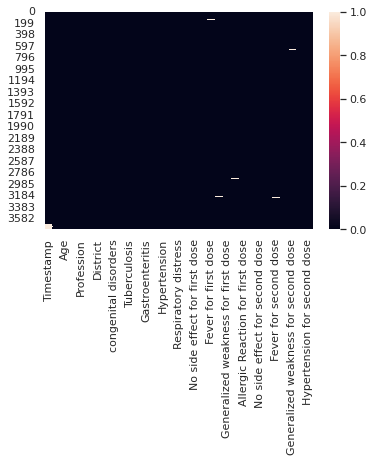

In [ ]:
sns.set()
sns.heatmap(df.isnull())

In [ ]:
hoy=df.select_dtypes(include=['int64','float64']).keys()
hoy

Index(['Age', 'Sex', 'congenital disorders', 'Cardiac disease', 'Tuberculosis',
       'Fever', 'Gastroenteritis', 'Diarrhoea', 'Hypertension',
       'Bleeding disorder', 'Respiratory distress', 'Thyroid',
       'No side effect for first dose',
       'Pain at injection site for first dose', 'Fever for first dose',
       'Muscle pain for first dose', 'Generalized weakness for first dose',
       'Headache for first dose', 'Allergic Reaction for first dose',
       'Hypertension for first dose', 'No side effect for second dose',
       'Pain at injection site for second dose', 'Fever for second dose',
       'Muscle pain for second dose', 'Generalized weakness for second dose',
       'Headache for second dose', 'Hypertension for second dose'],
      dtype='object')

In [ ]:
class1=['Age', 'Sex', 'congenital disorders', 'Cardiac disease', 'Tuberculosis',
       'Fever', 'Gastroenteritis', 'Diarrhoea', 'Hypertension',
       'Bleeding disorder', 'Respiratory distress', 'Thyroid',
       'No side effect for first dose',
       'Pain at injection site for first dose', 'Fever for first dose',
       'Muscle pain for first dose', 'Generalized weakness for first dose',
       'Headache for first dose', 'Allergic Reaction for first dose',
       'Hypertension for first dose', 'No side effect for second dose',
       'Pain at injection site for second dose', 'Fever for second dose',
       'Muscle pain for second dose', 'Generalized weakness for second dose',
       'Headache for second dose', 'Hypertension for second dose']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

AxesSubplot(0.327174,0.840263;0.168478x0.0397368)
AxesSubplot(0.529348,0.840263;0.168478x0.0397368)
AxesSubplot(0.731522,0.840263;0.168478x0.0397368)
AxesSubplot(0.125,0.792579;0.168478x0.0397368)
AxesSubplot(0.327174,0.792579;0.168478x0.0397368)
AxesSubplot(0.529348,0.792579;0.168478x0.0397368)
AxesSubplot(0.731522,0.792579;0.168478x0.0397368)
AxesSubplot(0.125,0.744895;0.168478x0.0397368)
AxesSubplot(0.327174,0.744895;0.168478x0.0397368)
AxesSubplot(0.529348,0.744895;0.168478x0.0397368)
AxesSubplot(0.731522,0.744895;0.168478x0.0397368)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

AxesSubplot(0.125,0.697211;0.168478x0.0397368)
AxesSubplot(0.327174,0.697211;0.168478x0.0397368)
AxesSubplot(0.529348,0.697211;0.168478x0.0397368)
AxesSubplot(0.731522,0.697211;0.168478x0.0397368)
AxesSubplot(0.125,0.649526;0.168478x0.0397368)
AxesSubplot(0.327174,0.649526;0.168478x0.0397368)
AxesSubplot(0.529348,0.649526;0.168478x0.0397368)
AxesSubplot(0.731522,0.649526;0.168478x0.0397368)
AxesSubplot(0.125,0.601842;0.168478x0.0397368)
AxesSubplot(0.327174,0.601842;0.168478x0.0397368)
AxesSubplot(0.529348,0.601842;0.168478x0.0397368)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

AxesSubplot(0.731522,0.601842;0.168478x0.0397368)
AxesSubplot(0.125,0.554158;0.168478x0.0397368)
AxesSubplot(0.327174,0.554158;0.168478x0.0397368)
AxesSubplot(0.529348,0.554158;0.168478x0.0397368)


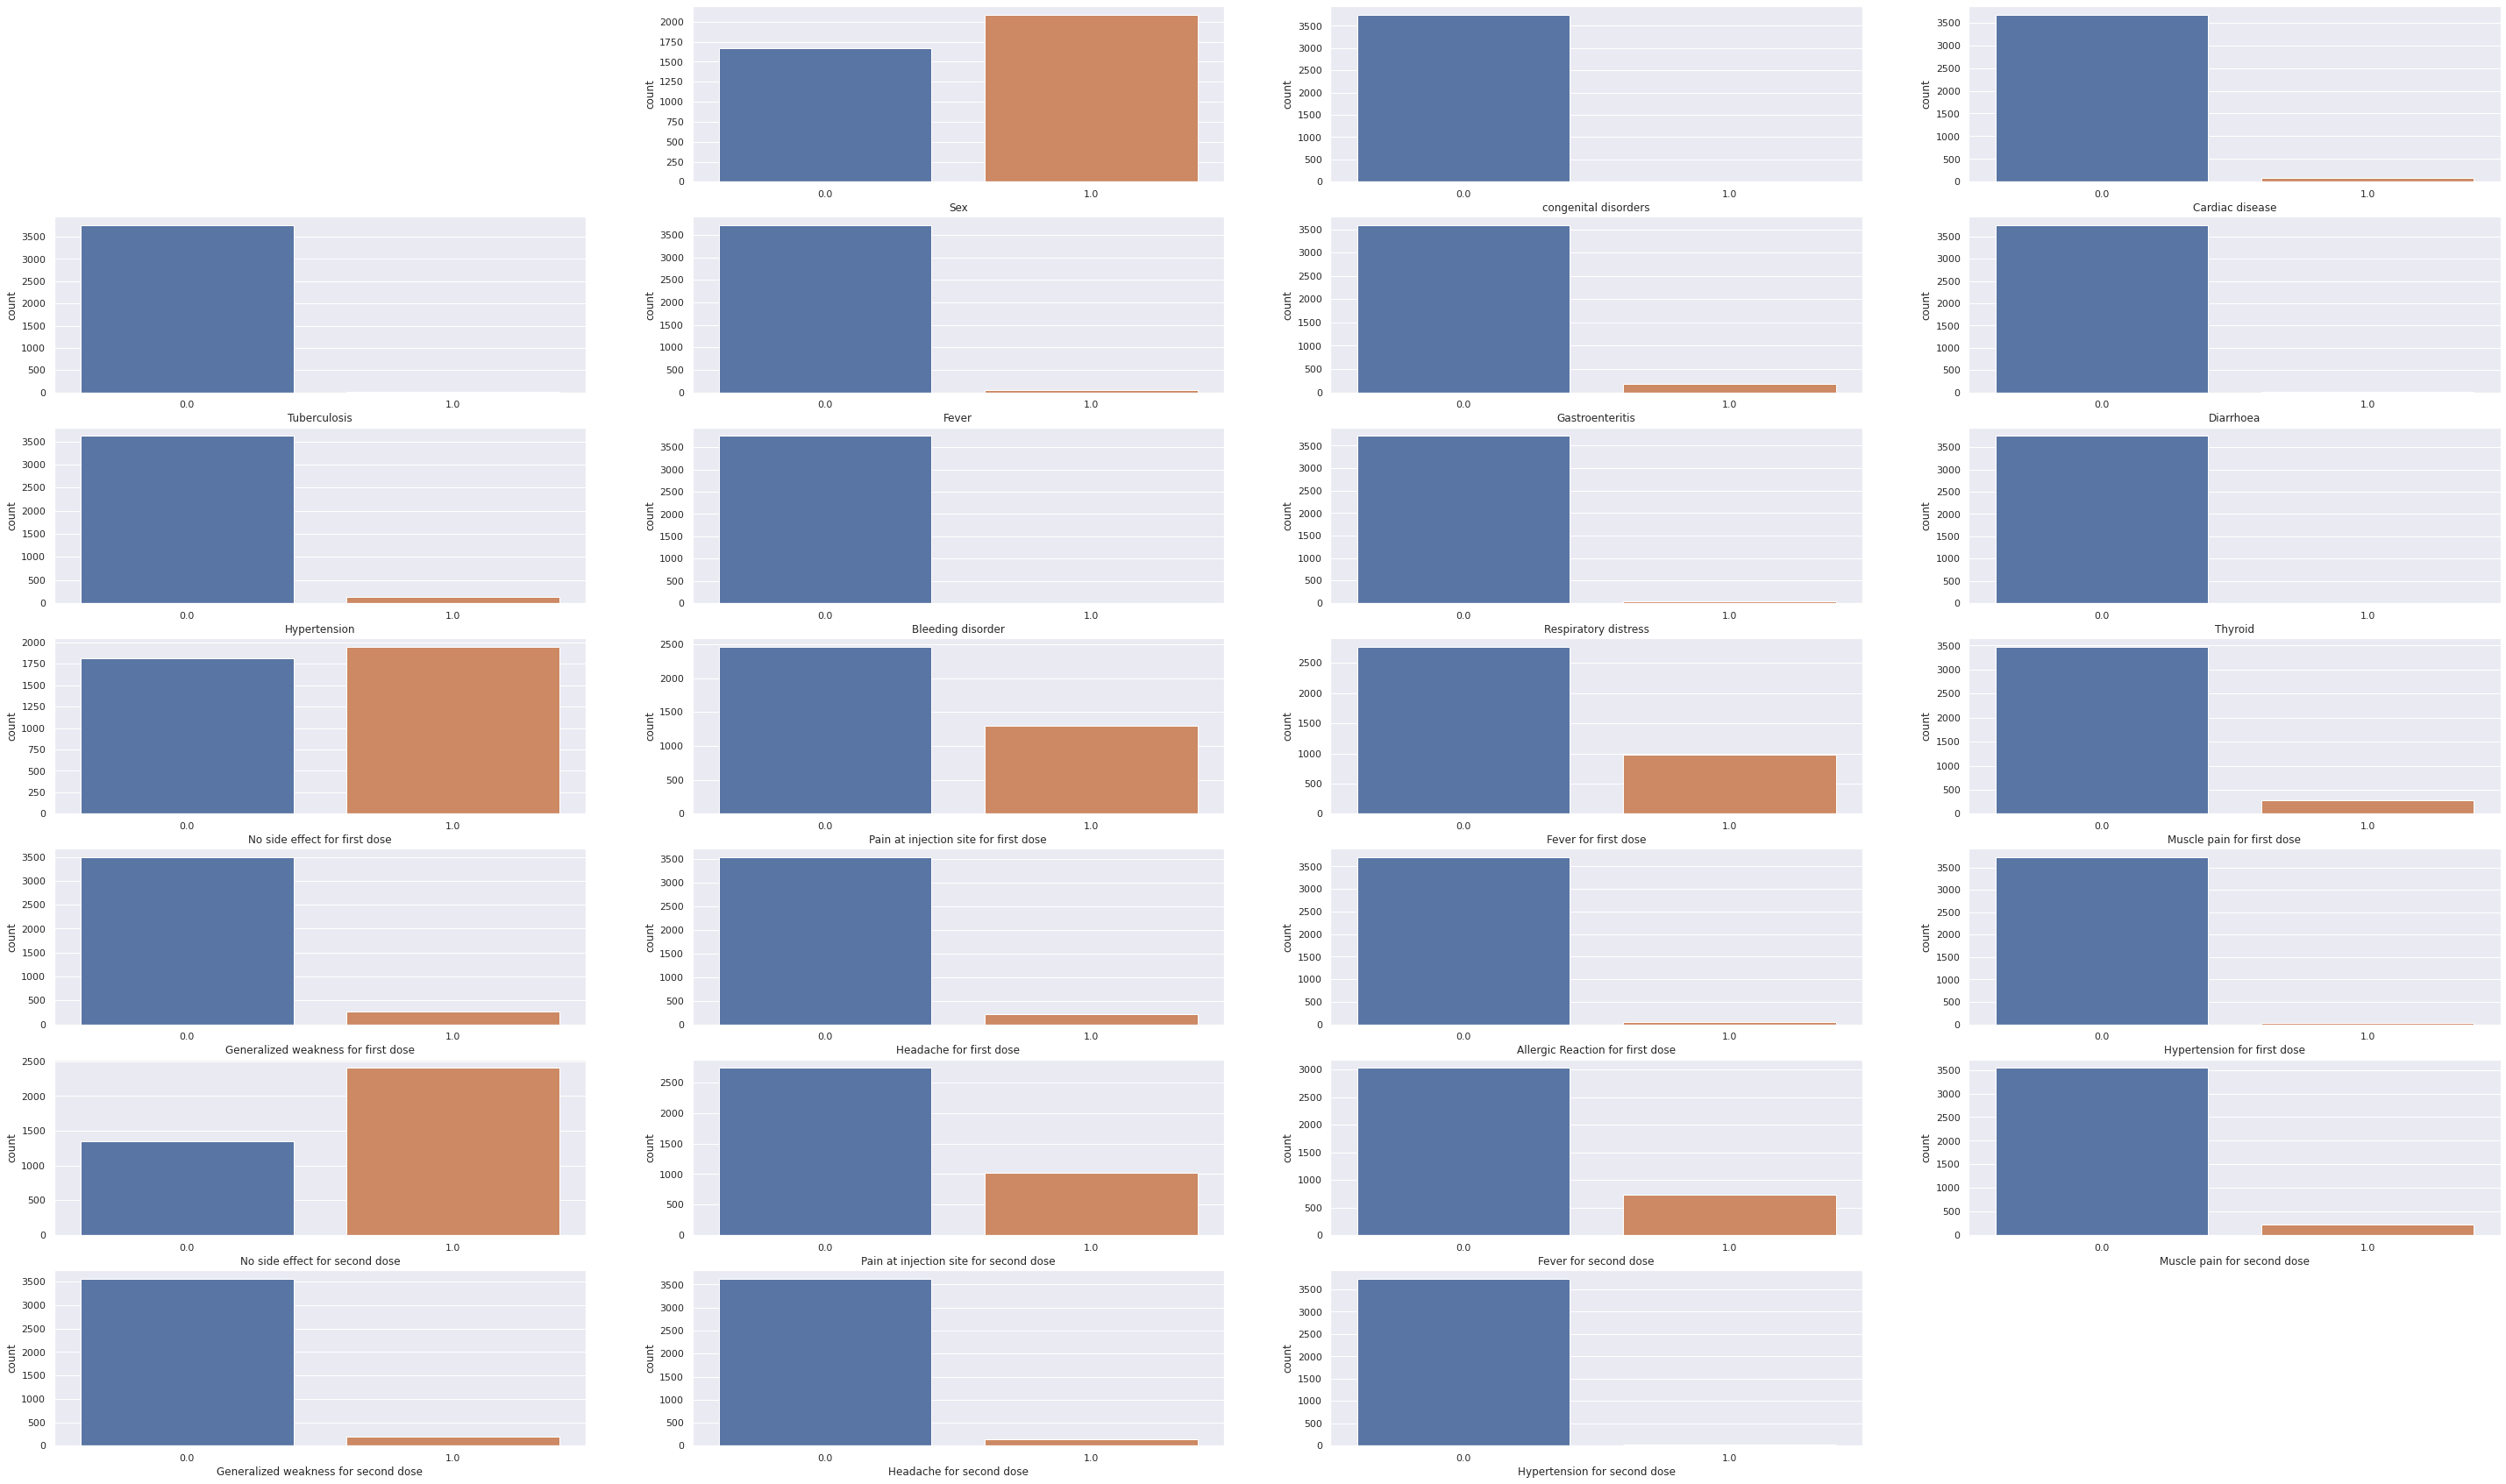

In [ ]:
plt.figure(figsize=(50,70))
for i in range(1,len(class1)):
  plt.subplot(16,4,i+1)
  print(sns.countplot(df[class1[i]]))
  

In [ ]:
df=df.drop(['Timestamp','Name','Profession','Name of Vaccine Center','District','congenital disorders','Tuberculosis','Diarrhoea','Bleeding disorder','Thyroid','Hypertension for second dose'],axis=1)

In [ ]:
df2_num=df.select_dtypes(include=['int64','float64'])
df2_num.isnull().sum()

Age                                       0
Sex                                       0
Cardiac disease                           0
Fever                                     0
Gastroenteritis                           0
Hypertension                              1
Respiratory distress                      1
No side effect for first dose             0
Pain at injection site for first dose     4
Fever for first dose                      5
Muscle pain for first dose                6
Generalized weakness for first dose       7
Headache for first dose                   4
Allergic Reaction for first dose          9
Hypertension for first dose               6
No side effect for second dose            3
Pain at injection site for second dose    1
Fever for second dose                     4
Muscle pain for second dose               2
Generalized weakness for second dose      3
Headache for second dose                  1
dtype: int64

In [ ]:
df2=df2_num.fillna(df2_num.mean())
df2.isnull().sum()

Age                                       0
Sex                                       0
Cardiac disease                           0
Fever                                     0
Gastroenteritis                           0
Hypertension                              0
Respiratory distress                      0
No side effect for first dose             0
Pain at injection site for first dose     0
Fever for first dose                      0
Muscle pain for first dose                0
Generalized weakness for first dose       0
Headache for first dose                   0
Allergic Reaction for first dose          0
Hypertension for first dose               0
No side effect for second dose            0
Pain at injection site for second dose    0
Fever for second dose                     0
Muscle pain for second dose               0
Generalized weakness for second dose      0
Headache for second dose                  0
dtype: int64

In [ ]:
df3=df2_num.fillna(df2_num.median())
df3.isnull().sum()

Age                                       0
Sex                                       0
Cardiac disease                           0
Fever                                     0
Gastroenteritis                           0
Hypertension                              0
Respiratory distress                      0
No side effect for first dose             0
Pain at injection site for first dose     0
Fever for first dose                      0
Muscle pain for first dose                0
Generalized weakness for first dose       0
Headache for first dose                   0
Allergic Reaction for first dose          0
Hypertension for first dose               0
No side effect for second dose            0
Pain at injection site for second dose    0
Fever for second dose                     0
Muscle pain for second dose               0
Generalized weakness for second dose      0
Headache for second dose                  0
dtype: int64

In [ ]:
df4=df.dropna()
df4.shape

(3710, 22)

In [ ]:
df5=df4.drop(['Name of vaccine'],axis=1)

In [ ]:
df5.head()

,Age,Sex,Cardiac disease,Fever,Gastroenteritis,Hypertension,Respiratory distress,No side effect for first dose,Pain at injection site for first dose,Fever for first dose,...,Generalized weakness for first dose,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose
0,65,1,1,0,1,1.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,58,1,0,0,0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,0,0.0,0.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,62,1,0,0,0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,1,0,0,0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df4['Name of vaccine']

0           AstraZeneca
1             Vero Cell
2             Vero Cell
3             Vero Cell
4             Vero Cell
             ...       
3757          vero Cell
3758            Sinovac
3759    Pfizer-BioNTech
3760          vero Cell
3761          vero Cell
Name: Name of vaccine, Length: 3710, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


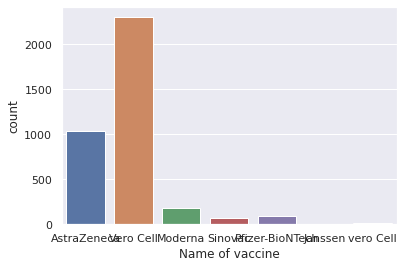

In [ ]:
sns.countplot(df4['Name of vaccine'])

In [ ]:
df4['Name of vaccine'].value_counts()

Vero Cell          2303
AstraZeneca        1043
Moderna             179
Pfizer-BioNTech      97
Sinovac              67
vero Cell            18
Janssen               3
Name: Name of vaccine, dtype: int64

In [ ]:
df4.drop(df4.index[df4['Name of vaccine'] == 'Janssen'], inplace = True)
df4.drop(df4.index[df4['Name of vaccine'] == 'vero Cell'], inplace = True)
#df4.drop(df4.index[df4['Name of vaccine'] == 'AstraZeneca'], inplace = True)




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


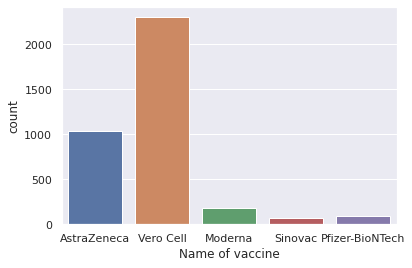

In [ ]:
sns.countplot(df4['Name of vaccine'])

In [ ]:
y=df4['Name of vaccine']
y

0           AstraZeneca
1             Vero Cell
2             Vero Cell
3             Vero Cell
4             Vero Cell
             ...       
3739          Vero Cell
3740    Pfizer-BioNTech
3741          Vero Cell
3758            Sinovac
3759    Pfizer-BioNTech
Name: Name of vaccine, Length: 3689, dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1=le.fit_transform(y)

In [ ]:
y=pd.DataFrame(y1, columns = ['Name of vaccine'])
y

,Name of vaccine
0,0
1,4
2,4
3,4
4,4
...,...
3684,4
3685,2
3686,4
3687,3


In [ ]:
df5=df5.sample(n= 3689)
df5.shape

(3689, 21)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y1 = oversample.fit_resample(df5, y)

In [ ]:
X.shape

(11515, 21)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y1,test_size=.1,random_state=101)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6, n_estimators=1000, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7473958333333334

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Vaccine', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[130  13   9   4  66]
 [ 12 184  13  12  10]
 [  7   8 201  16   5]
 [  6  10   8 194   6]
 [ 67  13   1   5 152]]
Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       222
           1       0.81      0.80      0.80       231
           2       0.87      0.85      0.86       237
           3       0.84      0.87      0.85       224
           4       0.64      0.64      0.64       238

    accuracy                           0.75      1152
   macro avg       0.75      0.75      0.75      1152
weighted avg       0.75      0.75      0.75      1152



In [ ]:
from matplotlib import style
class1=['AstraZeneca','Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']
precision=[ 0.55 ,0.76,0.80,0.87,0.61]
recall=[ 0.55,0.83 ,0.91,0.83,0.49]
f1score=[0.55 ,0.79,0.85,0.85,0.54]


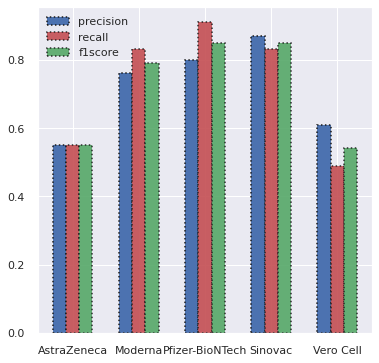

In [ ]:
plt.figure(figsize=(6,6))
class2=np.arange(len(class1))
width=0.2
plt.bar(class2,precision,color='b',width=0.2,edgecolor='k',linewidth=1.5,alpha=1,linestyle=':',label='precision')
plt.bar(class2+width,recall,color='r',width=0.2,edgecolor='k',linewidth=1.5,alpha=0.9,linestyle=':',label='recall')
plt.bar(class2+width+width,f1score,color='g',width=0.2,edgecolor='k',linewidth=1.5,alpha=0.9,linestyle=':',label='f1score')
plt.xticks(class2+width,class1)
plt.legend()

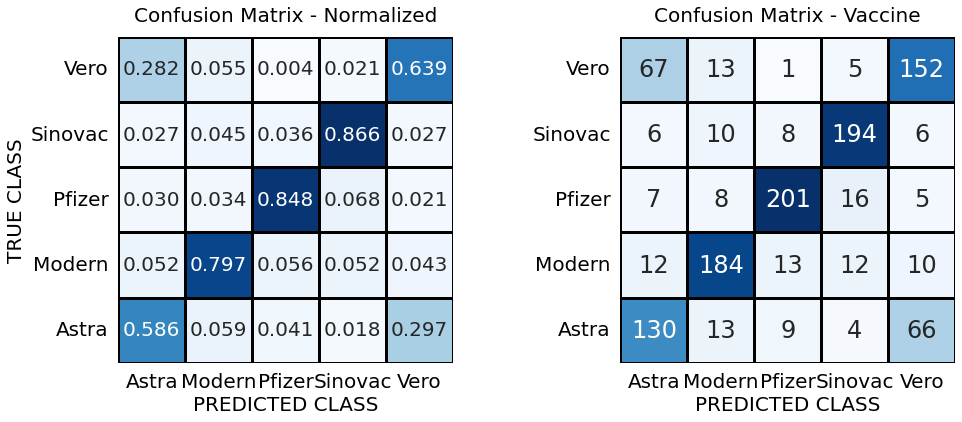

In [ ]:
classes=['Astra','Modern','Pfizer','Sinovac','Vero']
plot_confusion_matrix(confusion_matrix=cm, class_names=classes, errors_only=False, fontsize=20)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

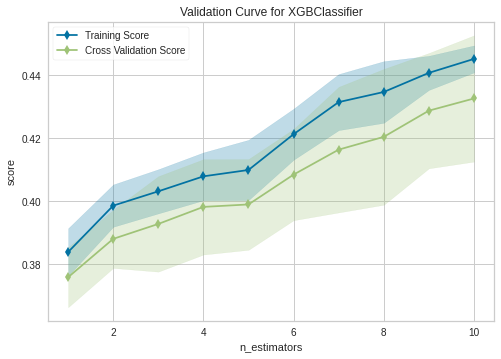

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(xgb.XGBClassifier(), xtrain, ytrain,
                                       param_name="n_estimators",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
model.score(xtrain,ytrain)

0.776898581491846

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgbm = LGBMClassifier(max_depth=7, n_estimators=500, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
lgbm.fit(xtrain,ytrain)
lgbm.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6822916666666666

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lgbm.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=11)
ex_tree_clf.fit(xtrain, ytrain)
ex_tree_clf.score(xtrain,ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7807584676252051

In [ ]:
ex_tree_clf.score(xtest,ytest)

0.6614583333333334

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=1000)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6744791666666666

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(xtrain, ytrain)
voting.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.4696180555555556

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
over = RandomOverSampler()

In [ ]:
X1, y2 = over.fit_resample(df5, y)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,y2,test_size=.1,random_state=101)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6, n_estimators=1000, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6831597222222222

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=1500)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6762152777777778

In [ ]:
model=SVC(gamma='scale')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.2074652777777778

In [ ]:
under = RandomUnderSampler()

In [ ]:
X3, y3 = under.fit_resample(df5, y)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X3,y3,test_size=.1,random_state=101)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6, n_estimators=1000, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.08823529411764706

In [ ]:
model=SVC(gamma='scale')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.11764705882352941

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=1000)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.08823529411764706

In [ ]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(xtrain)
output_scaler = scaler_y.fit(ytrain)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(ytrain)
train_x_norm = input_scaler.transform(xtrain)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(ytest)
test_x_norm = input_scaler.transform(xtest)

In [ ]:
def create_dataset (X, y, time_steps = 3):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (4, 30, 21)
y_train.shape:  (271, 1)
X_test.shape:  (4, 30, 21)
y_test.shape:  (271, 1)


In [ ]:
y_train

array([[0.25],
       [0.5 ],
       [0.25],
       [0.5 ],
       [1.  ],
       [0.75],
       [0.75],
       [0.75],
       [0.  ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.75],
       [1.  ],
       [0.75],
       [0.25],
       [1.  ],
       [0.25],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.25],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [1.  ],
       [0.5 ],
       [0.25],
       [1.  ],
       [0.25],
       [0.75],
       [0.75],
       [0.5 ],
       [1.  ],
       [0.75],
       [0.25],
       [0.75],
       [0.  ],
       [0.5 ],
       [0.75],
       [0.  ],
       [0.25],
       [0.5 ],
       [0.25],
       [0.5 ],
       [0.5 ],
       [0.75],
       [1.  ],
       [0.75],
       [1.  ],
       [0.25],
       [0.  ],
       [1.  ],
       [0.25],
       [0.5 ],
       [0.  ],
       [0.75],
       [0.5 ],
       [0.75],
       [1.  ],
       [1.  ],
       [0.25],
       [0.5 ],
       [0.  ],
       [0.

In [ ]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,Embedding
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(30,21)))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1,activation='softmax'))
    #Compile model
    model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, 
                 input_shape = (30,21)))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid')) 
    #Compile model
    model.compile(optimizer=keras.optimizers.RMSprop(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model


# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

The `lr` argument is deprecated, use `learning_rate` instead.


In [ ]:
history=model_lstm.fit(X_train, y_train,
           batch_size=32,
           epochs=12,
           validation_data=[X_test, y_test])

Epoch 1/12
9/9 [==============================] - 6s 160ms/step - loss: 0.8673 - accuracy: 0.2177 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 2/12
9/9 [==============================] - 0s 37ms/step - loss: 0.7016 - accuracy: 0.1808 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/12
9/9 [==============================] - 0s 35ms/step - loss: 0.6919 - accuracy: 0.2399 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 4/12
9/9 [==============================] - 0s 35ms/step - loss: 0.6922 - accuracy: 0.2177 - val_loss: 0.7133 - val_accuracy: 0.2500
Epoch 5/12
9/9 [==============================] - 0s 35ms/step - loss: 0.6944 - accuracy: 0.2140 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 6/12
9/9 [==============================] - 0s 34ms/step - loss: 0.6997 - accuracy: 0.2362 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 7/12
9/9 [==============================] - 0s 35ms/step - loss: 0.6926 - accuracy: 0.2251 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 8/12
9/9 [==========

In [ ]:
x1=x1.dropna()

In [ ]:
y1=y1.sample(n=3689)
y1


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=.1,random_state=1000)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=1000)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
clf.score(xtest,ytest)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y2 = oversample.fit_resample(x1, y1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y2,test_size=.1,random_state=1000)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=1000)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

In [ ]:
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
clf.score(xtest,ytest)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(xtrain, ytrain)
voting.score(xtest,ytest)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier()
ex_tree_clf.fit(xtrain, ytrain)
ex_tree_clf.score(xtest,ytest)

In [ ]:
x2=pd.concat([s_train,y],axis=1)

In [ ]:
x2=x2.dropna()

In [ ]:
x2

In [ ]:
y2=df2['No side effect for second dose']
y2

In [ ]:
y2=y2.sample(n=3617)
y2


In [ ]:
x1train,x1test,y1train,y1test=train_test_split(x2,y2,test_size=.2,random_state=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x1train, y1train)
clf.score(x1test,y1test)